In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/course/module5_course_handling_duplicate_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module5/course/module5_course_handling_duplicate_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module5_course_handling_duplicate_train.csv')
download_file(test_data_url, 'module5_course_handling_duplicate_test.csv')

Downloaded module5_course_handling_duplicate_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/course/module5_course_handling_duplicate_train.csv
Downloaded module5_course_handling_duplicate_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module5/course/module5_course_handling_duplicate_test.csv


In [3]:
df_train = pd.read_csv("module5_course_handling_duplicate_train.csv")
df_test = pd.read_csv("module5_course_handling_duplicate_test.csv")

## Data Analysis

In [4]:
df = df_train.copy()

In [5]:
df

,id,station_id,Date,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
0,1004,2,2018-02-26,67.969373,60.388810,55.225714,55.104789,59.387960,54.756166,96.853865,80.598458,60.207305,12.935215,7.712413,5.116875,30.668983,28.960075,29.629091,1.012362
1,196,2,2016-09-17,95.948601,88.050195,78.075118,83.052731,72.894391,76.959174,100.000000,85.432151,48.032289,8.694016,2.926433,0.000000,27.286810,29.300076,29.476171,0.010421
2,1618,2,2019-03-03,64.492885,51.923724,44.047472,63.844377,52.230213,37.018404,100.000000,92.927996,77.405888,24.506589,11.785035,0.000000,28.800923,27.541369,30.946841,0.077232
3,1708,2,2019-04-29,96.537128,79.610470,63.832148,78.172585,68.295921,66.613207,88.500668,73.561713,60.270858,19.795213,12.432935,4.878249,30.063147,27.581128,26.625135,0.000000
4,435,2,2017-03-08,100.154854,77.665061,79.272763,75.550870,74.056270,73.903439,98.145218,84.274033,57.868917,12.908236,5.283480,2.816518,28.923668,32.502365,31.766098,0.094555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,1638,3,2019-03-16,63.416642,61.134908,52.122978,39.242960,34.641944,31.138901,59.507794,44.225270,29.621452,12.016916,7.026380,0.000000,28.686244,31.916502,30.172120,0.000000
2387,1095,3,2018-05-03,87.489637,74.374792,70.431262,66.307615,67.592319,44.821785,91.338251,74.250247,41.470621,18.396672,8.676723,4.785500,29.551961,31.102061,29.976737,0.021024
2388,1130,2,2018-05-22,83.143717,74.644876,71.124426,81.531093,77.144427,73.566807,100.000000,81.511082,53.207986,14.327634,3.862451,0.000000,30.415964,31.577616,30.740584,0.392595
2389,1294,3,2018-09-03,73.613004,57.646779,44.855063,56.346767,50.841723,43.892383,97.901064,73.618842,47.963116,20.972752,8.358100,0.000000,31.763593,30.471271,29.415246,0.000000


Total duplicates: 744


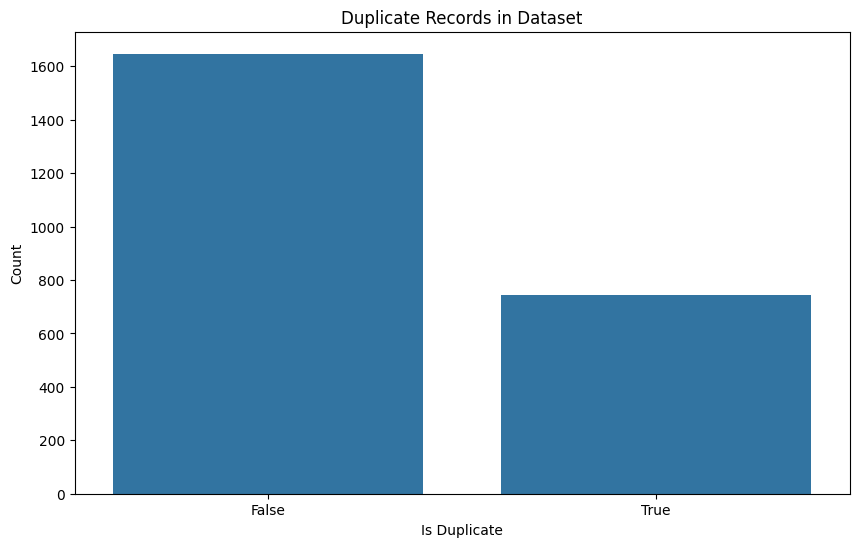

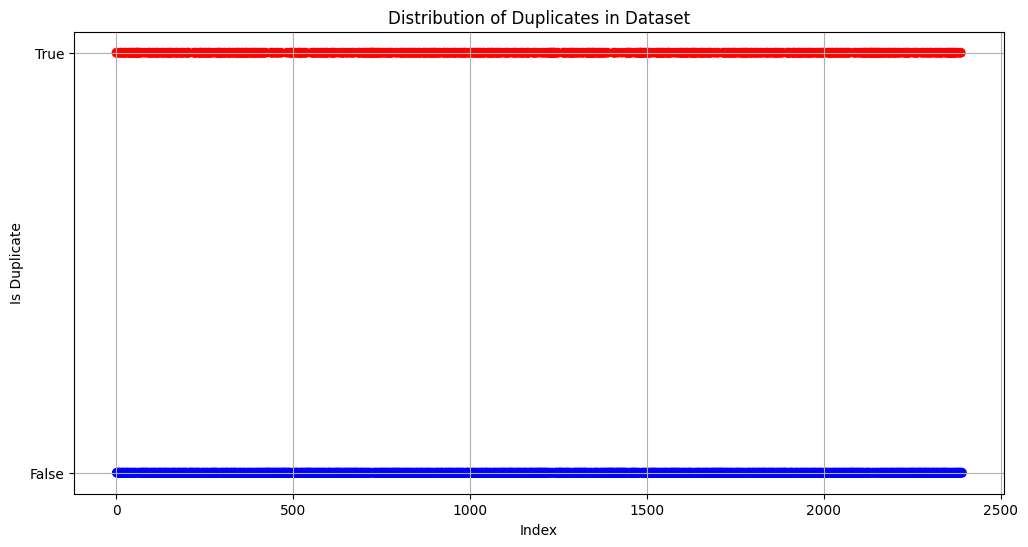

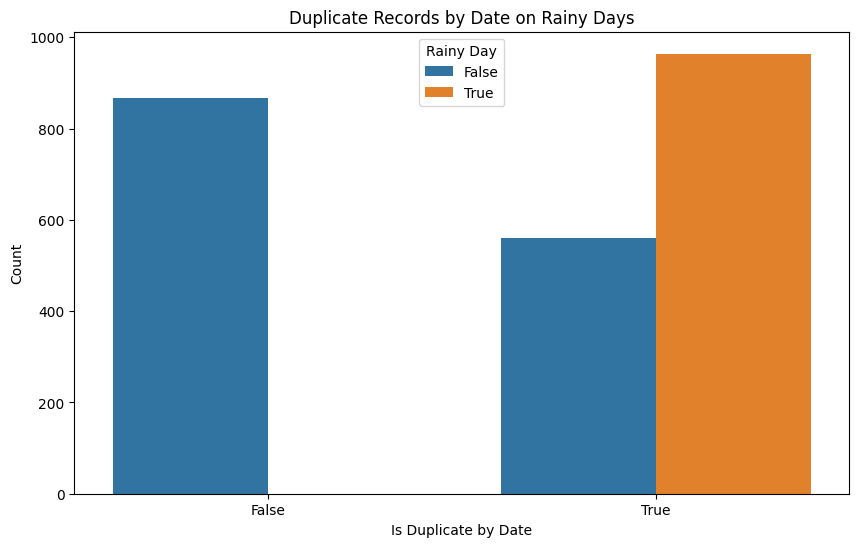

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify duplicates
# Adding a new column that flags duplicates based on all columns
# Identify duplicates based on all columns or specific columns
df['is_duplicate'] = df.duplicated(keep=False)

# Count of duplicates
print("Total duplicates:", df['is_duplicate'].sum())

# Visualization of duplicates
plt.figure(figsize=(10, 6))
sns.countplot(x='is_duplicate', data=df)
plt.title('Duplicate Records in Dataset')
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.show()

# Fixing the scatter plot error by removing 'hue' and 'style' that caused the problem
plt.figure(figsize=(12, 6))
plt.scatter(x=df.index, y=df['is_duplicate'].map({True: 1, False: 0}), c=['red' if x else 'blue' for x in df['is_duplicate']], marker='o')
plt.title('Distribution of Duplicates in Dataset')
plt.xlabel('Index')
plt.ylabel('Is Duplicate')
plt.yticks([0, 1], ['False', 'True'])
plt.grid(True)
plt.show()

# Explore duplicates related to 'Date' and 'Station_ID', especially on rainy days
# Define rainy days as days with Precipit greater than a threshold, e.g., 0.1mm
rainy_days_threshold = 0.1
df['rainy_day'] = df['Precipit'] > rainy_days_threshold

# Identify duplicates by 'Date' and 'Station_ID'
df['date_station_duplicate'] = df.duplicated(subset=['Date'], keep=False)

# Visualization of date and station duplicates, especially on rainy days
plt.figure(figsize=(10, 6))
sns.countplot(x='date_station_duplicate', hue='rainy_day', data=df)
plt.title('Duplicate Records by Date on Rainy Days')
plt.xlabel('Is Duplicate by Date')
plt.ylabel('Count')
plt.legend(title='Rainy Day')
plt.show()

# Cleaning up by removing the added columns after analysis
df.drop(columns=['is_duplicate', 'rainy_day', 'date_station_duplicate'], inplace=True)

In [7]:
number_station_daily = df.groupby('Date')['station_id'].count()
number_station_daily

Date
2016-01-06    1
2016-01-07    1
2016-01-08    1
2016-01-09    3
2016-01-10    1
             ..
2019-10-20    1
2019-10-21    6
2019-10-22    3
2019-10-23    1
2019-10-24    1
Name: station_id, Length: 1241, dtype: int64

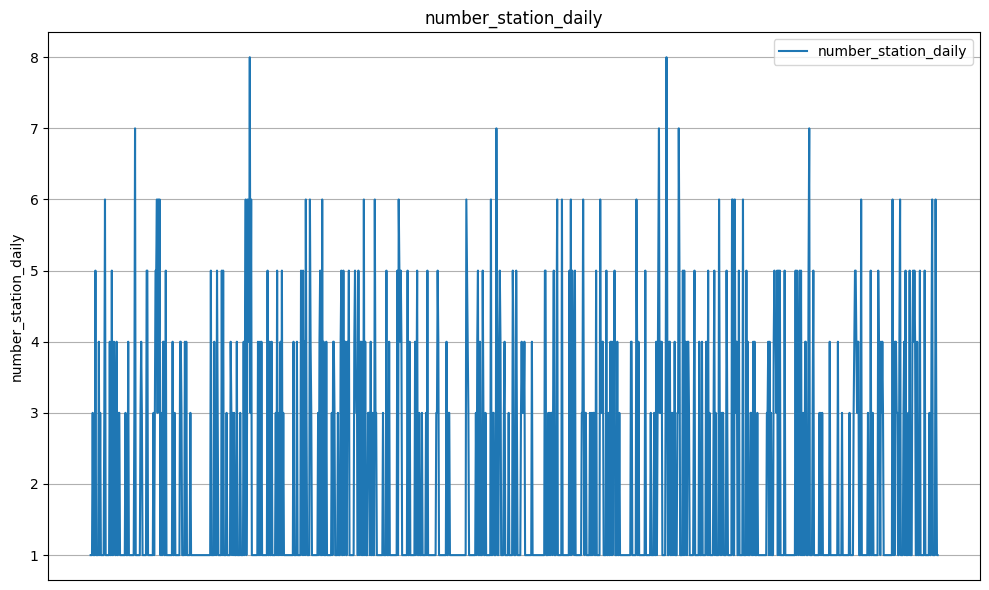

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(number_station_daily.index, number_station_daily.values, label='number_station_daily', linestyle='-')
plt.xlabel('Date')
plt.ylabel('number_station_daily')
plt.title('number_station_daily')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.gca().axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.show()

## Data Cleaning - handling duplicate


Metrics for No Duplicates Handled:
  Train MAE: 0.5041
  Test MAE: 0.3541
  Train MSE: 1.0513
  Test MSE: 0.2276

Metrics for All Duplicates Dropped:
  Train MAE: 0.4344
  Test MAE: 0.3108
  Train MSE: 0.8508
  Test MSE: 0.1824

Metrics for Date-based Duplicates Dropped:
  Train MAE: 0.2731
  Test MAE: 0.2271
  Train MSE: 0.4792
  Test MSE: 0.1185

Strategy Comparison:

MAE Comparison:
  Train:
    No Duplicates Handled: 0.5041
    All Duplicates Dropped: 0.4344
    Date-based Duplicates Dropped: 0.2731
  Test:
    No Duplicates Handled: 0.3541
    All Duplicates Dropped: 0.3108
    Date-based Duplicates Dropped: 0.2271

MSE Comparison:
  Train:
    No Duplicates Handled: 1.0513
    All Duplicates Dropped: 0.8508
    Date-based Duplicates Dropped: 0.4792
  Test:
    No Duplicates Handled: 0.2276
    All Duplicates Dropped: 0.1824
    Date-based Duplicates Dropped: 0.1185

Best strategy based on Test MAE: Date-based Duplicates Dropped


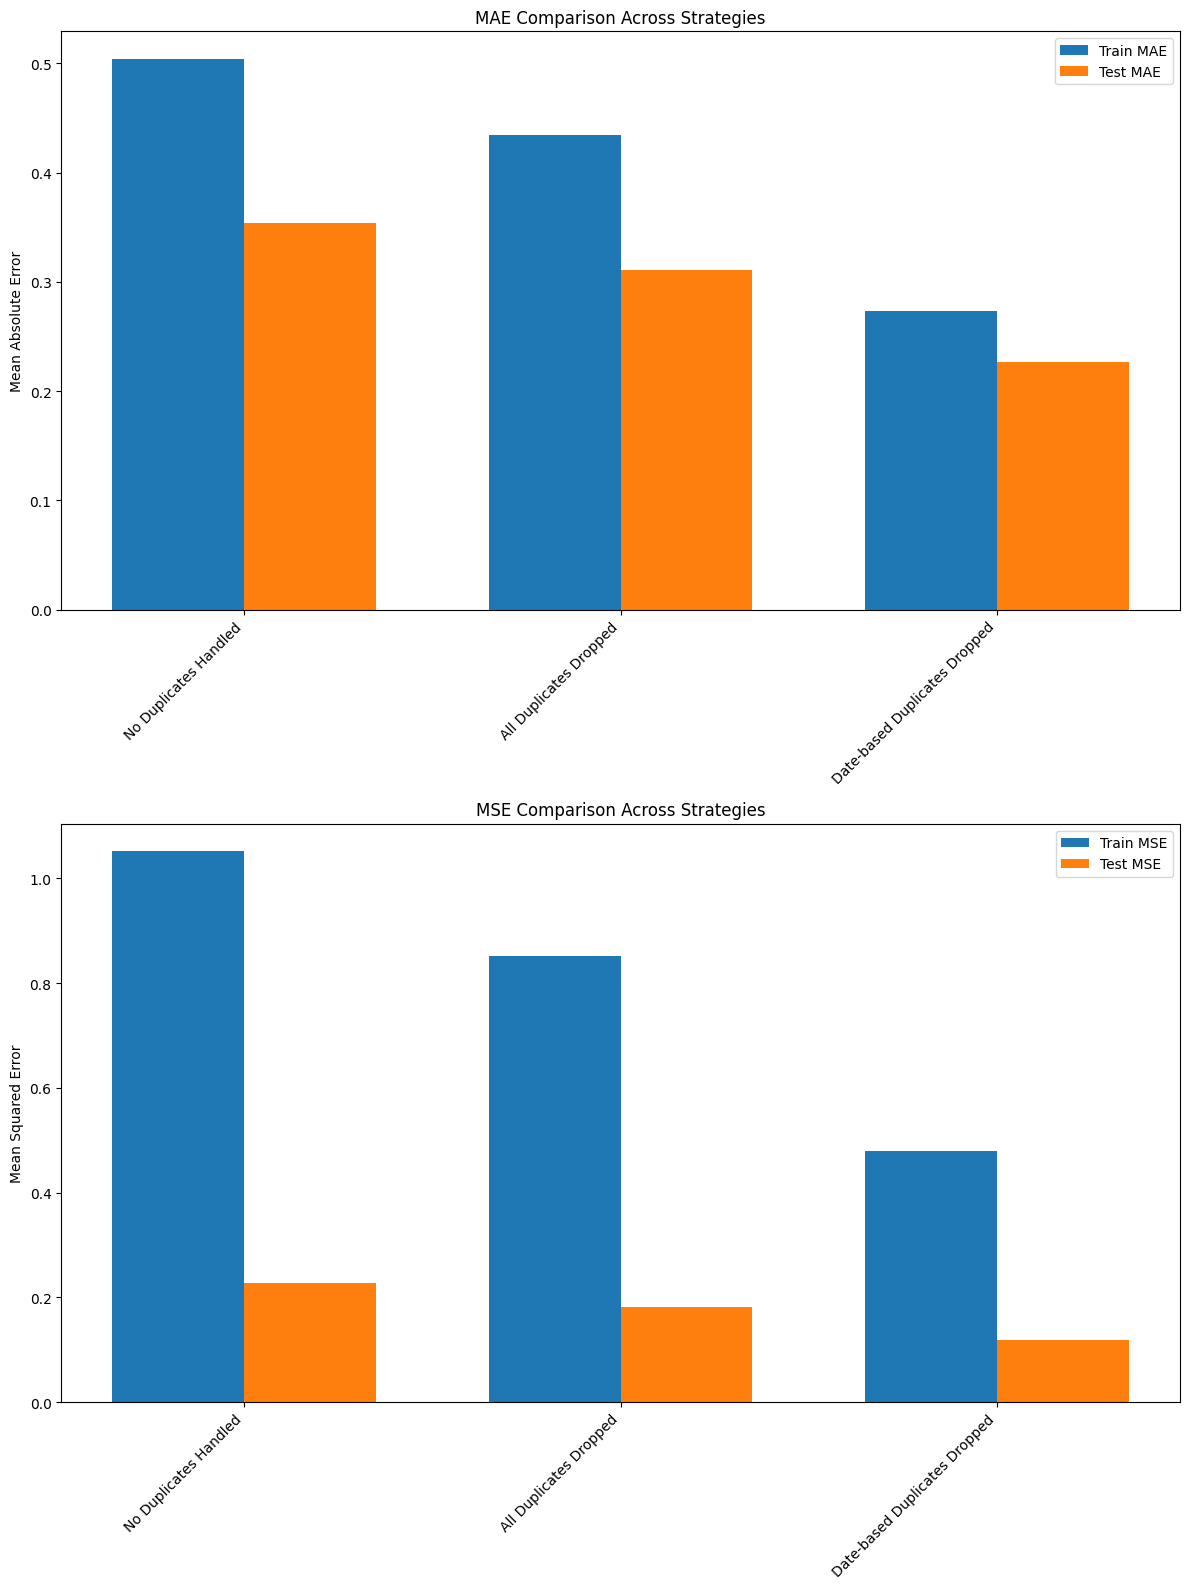

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

def plot_comparison(metrics_list, strategies):
    """
    Create a bar plot to compare different strategies.
    
    Parameters:
        metrics_list (list): List of dictionaries containing metrics for each strategy.
        strategies (list): List of strategy names.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
    
    x = np.arange(len(strategies))
    width = 0.35
    
    # Plot MAE
    train_mae = [m['train_mae'] for m in metrics_list]
    test_mae = [m['test_mae'] for m in metrics_list]
    
    ax1.bar(x - width/2, train_mae, width, label='Train MAE')
    ax1.bar(x + width/2, test_mae, width, label='Test MAE')
    
    ax1.set_ylabel('Mean Absolute Error')
    ax1.set_title('MAE Comparison Across Strategies')
    ax1.set_xticks(x)
    ax1.set_xticklabels(strategies, rotation=45, ha='right')
    ax1.legend()
    
    # Plot MSE
    train_mse = [m['train_mse'] for m in metrics_list]
    test_mse = [m['test_mse'] for m in metrics_list]
    
    ax2.bar(x - width/2, train_mse, width, label='Train MSE')
    ax2.bar(x + width/2, test_mse, width, label='Test MSE')
    
    ax2.set_ylabel('Mean Squared Error')
    ax2.set_title('MSE Comparison Across Strategies')
    ax2.set_xticks(x)
    ax2.set_xticklabels(strategies, rotation=45, ha='right')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

def prepare_data(df, drop_cols, target):
    """
    Prepare the dataset by dropping specified columns and splitting into features and target.
    
    Parameters:
        df (DataFrame): The DataFrame to process.
        drop_cols (list): List of columns to drop from the DataFrame.
        target (str): The target variable name.
    Returns:
        X (DataFrame): Features DataFrame.
        y (Series): Target variable Series.
    """
    df_ = df.drop(drop_cols, axis=1)
    X = df_.drop(target, axis=1)
    y = df_[target]
    return X, y

def train_and_evaluate(X_train, y_train, X_test, y_test):
    """
    Train a Linear Regression model and evaluate it using various metrics.
    
    Parameters:
        X_train (DataFrame): Training features.
        y_train (Series): Training target.
        X_test (DataFrame): Testing features.
        y_test (Series): Testing target.
    Returns:
        dict: A dictionary containing various evaluation metrics for both train and test sets.
    """
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    return {
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
    }

def print_metrics(metrics, strategy_name):
    """
    Print evaluation metrics in a formatted manner.
    
    Parameters:
        metrics (dict): Dictionary containing evaluation metrics.
        strategy_name (str): Name of the strategy being evaluated.
    """
    print(f"\nMetrics for {strategy_name}:")
    print(f"  Train MAE: {metrics['train_mae']:.4f}")
    print(f"  Test MAE: {metrics['test_mae']:.4f}")
    print(f"  Train MSE: {metrics['train_mse']:.4f}")
    print(f"  Test MSE: {metrics['test_mse']:.4f}")

# Handling duplicates with different strategies
# Strategy 1: No handling of duplicates
X_train, y_train = prepare_data(df_train, ['Date', 'id'], 'Precipit')
X_test, y_test = prepare_data(df_test, ['Date', 'id'], 'Precipit')
metrics_no_duplicates_handled = train_and_evaluate(X_train, y_train, X_test, y_test)

# Strategy 2: Drop all duplicates
df_train_deduped = df_train.drop_duplicates()
X_train, y_train = prepare_data(df_train_deduped, ['Date', 'id'], 'Precipit')
X_test, y_test = prepare_data(df_test, ['Date', 'id'], 'Precipit')
metrics_all_duplicates_dropped = train_and_evaluate(X_train, y_train, X_test, y_test)

# Strategy 3: Drop duplicates based on 'Date' only
df_train_date_deduped = df_train.drop_duplicates(subset=['Date'])
X_train, y_train = prepare_data(df_train_date_deduped, ['Date', 'id'], 'Precipit')
X_test, y_test = prepare_data(df_test, ['Date', 'id'], 'Precipit')
metrics_date_duplicates_dropped = train_and_evaluate(X_train, y_train, X_test, y_test)

# Print metrics for each strategy
print_metrics(metrics_no_duplicates_handled, "No Duplicates Handled")
print_metrics(metrics_all_duplicates_dropped, "All Duplicates Dropped")
print_metrics(metrics_date_duplicates_dropped, "Date-based Duplicates Dropped")

# Compare strategies
strategies = ["No Duplicates Handled", "All Duplicates Dropped", "Date-based Duplicates Dropped"]
metrics_list = [metrics_no_duplicates_handled, metrics_all_duplicates_dropped, metrics_date_duplicates_dropped]

print("\nStrategy Comparison:")
for metric in ['mae', 'mse']:
    print(f"\n{metric.upper()} Comparison:")
    for dataset in ['train', 'test']:
        print(f"  {dataset.capitalize()}:")
        for strategy, metrics in zip(strategies, metrics_list):
            print(f"    {strategy}: {metrics[f'{dataset}_{metric}']:.4f}")

# Identify best strategy
best_strategy = min(zip(strategies, metrics_list), key=lambda x: x[1]['test_mae'])[0]
print(f"\nBest strategy based on Test MAE: {best_strategy}")

# Plot the comparison
plot_comparison(metrics_list, strategies)